# Libraries

In [1]:
import time
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#creating dataframe
ipl_data=pd.read_csv('ipl.csv')
print(ipl_data.shape)
ipl_data.head()

(76014, 15)


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
#Check for duplicates and remove if present.
ipl_data=ipl_data.drop_duplicates()

#count of missing values in the dataset
print("Num of missing values in the dataset is:",ipl_data.isnull().sum().sum())

print(ipl_data.shape)
#ipl_data.head()

Num of missing values in the dataset is: 0
(76014, 15)


In [4]:
#Dropping unnecessary columns
ipl_data=ipl_data.drop(['mid','date','striker','non-striker'],axis=1)
print(ipl_data.shape)
ipl_data.head()

(76014, 11)


,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,222


In [5]:
#creating a dictionary of batsman and bowler.
batsman=list(set(ipl_data['batsman'].to_list()))
bowler=list(set(ipl_data['bowler'].to_list()))

batsman.extend(bowler)
batsman_bowler=list(set(batsman))
batsman_bowler.sort()

batsman_bowler_ind=[i for i in range(len(batsman_bowler))]
batsman_bowler_dict=dict(zip(batsman_bowler,batsman_bowler_ind))

#creating a dictionary of bat_team and bowl_team.
bat_team=list(set(ipl_data['bat_team'].to_list()))
bowl_team=list(set(ipl_data['bowl_team'].to_list()))

bat_team.extend(bowl_team)
bat_bowl_team=list(set(bat_team))
bat_bowl_team.sort()

bat_bowl_team_ind=[i for i in range(len(bat_bowl_team))]
bat_bowl_team_dict=dict(zip(bat_bowl_team,bat_bowl_team_ind))

#creating a dictionary of venue.
venue=list(set(ipl_data['venue'].to_list()))
venue.sort()

venue_ind=[i for i in range(len(venue))]

venue_dict=dict(zip(venue,venue_ind))

In [6]:
import pickle
with open("dict.pickle", "wb") as f:
    pickle.dump((batsman_bowler_dict,bat_bowl_team_dict,venue_dict), f)

with open("dict.pickle", "rb") as f:
    batsman_bowler_dict,bat_bowl_team_dict,venue_dict = pickle.load(f) 

In [7]:
#replacing name with the index
batsman_ind=[]
bowler_ind=[]
for i in ipl_data['batsman'].to_list():
  batsman_ind.append(batsman_bowler_dict[i])
for i in ipl_data['bowler'].to_list():
  bowler_ind.append(batsman_bowler_dict[i])


bat_team_ind=[]
bowl_team_ind=[]
for i in ipl_data['bat_team'].to_list():
  bat_team_ind.append(bat_bowl_team_dict[i])
for i in ipl_data['bowl_team'].to_list():
  bowl_team_ind.append(bat_bowl_team_dict[i])


match_venue_ind=[]
for i in ipl_data['venue'].to_list():
  match_venue_ind.append(venue_dict[i])


In [8]:
#replacing the text columns like ['batsman','bowler','bat_team','bowl_team','venue'] with indexs.
ipl_data=ipl_data.drop(['batsman','bowler','bat_team','bowl_team','venue'],axis=1)
ipl_data['venue']=match_venue_ind
ipl_data['bat_team']=bat_team_ind
ipl_data['bowl_team']=bowl_team_ind
ipl_data['batsman']=batsman_ind
ipl_data['bowler']=bowler_ind
print(ipl_data.shape)
ipl_data.head()

(76014, 11)


,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue,bat_team,bowl_team,batsman,bowler
0,1,0,0.1,1,0,222,14,6,12,382,295
1,1,0,0.2,1,0,222,14,6,12,69,295
2,2,0,0.2,2,0,222,14,6,12,69,295
3,2,0,0.3,2,0,222,14,6,12,69,295
4,2,0,0.4,2,0,222,14,6,12,69,295


# Train Test Split

In [10]:
#seperating the target variable
X=ipl_data.drop('total',axis=1)
Y=ipl_data['total']
print(X.shape)
print(Y.shape)

(76014, 10)
(76014,)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(57010, 10) (57010,)
(19004, 10) (19004,)


# Modelling 

In [ ]:
# Hyperparameter tuning on Random Forest model using RadomizedSearch CV.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

params={'n_estimators':[int(i) for i in np.linspace(100,2000,10)],
        'max_depth':[int(i) for i in np.linspace(3,50,10)]
}

rf=RandomForestRegressor()
rand_rf=RandomizedSearchCV(rf,params,n_jobs=-1,cv=3,verbose=1)
rand_rf.fit(X_train,Y_train)
rand_rf.best_params_

In [12]:
#Training the model with best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,max_depth=30,n_jobs=-1,verbose=1)
rf.fit(X_train,Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.0min finished


RandomForestRegressor(max_depth=30, n_estimators=1000, n_jobs=-1, verbose=1)

In [12]:
import pickle
#pickle.dump((rf),open('rf.pkl','wb')) #for dump
rf= pickle.load(open('rf.pkl', 'rb')) #for extracting

In [13]:
#predicting train and test data 
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   24.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   28.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.6s finished


In [14]:
#Calculating Train and Test MSE.
from sklearn.metrics import mean_squared_error

mse_train=mean_squared_error(Y_train,y_train_pred)
mse_test=mean_squared_error(Y_test,y_test_pred)
print(mse_train)
print(mse_test)

7.355875851086488
55.818875945003334


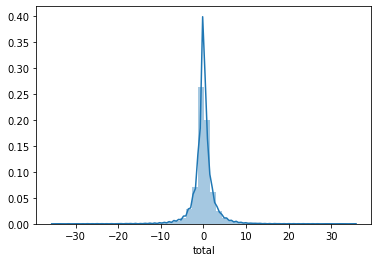

In [15]:
#Train error pdf
sns.distplot(Y_train-y_train_pred)

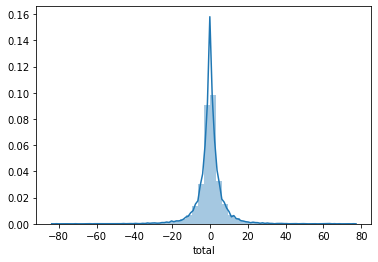

In [16]:
#Test error pdf
sns.distplot(Y_test-y_test_pred)

Observations from pdf:
1. It is observed that peak is at 0 for train and test data, which indicates that error is zero for most of the predictions.
2. Since the error is almost zero for most of the datapoints, we can consider this model. 